In [1]:
import matplotlib.pyplot as plt
import neatplot
import seaborn as sns
import pandas
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

neatplot.set_style("fonts")

In [2]:
path = Path("./")
data = []
for p in path.rglob("*"):
    if not p.stem.startswith("seed"):
        continue
    exp_dir = p
#     with open(exp_dir / "settings.pkl", "rb") as f:
#         settings = pickle.load(f)
#     print(settings)
    dir_list = str(exp_dir).split('/')
    acq_func = dir_list[0]
    seed = int(dir_list[1].split('_')[1])
#     print(acq_func)
#     print(seed)
#     input('paused')
    true_costs = np.load(exp_dir / "true_costs.npy")
    areas = np.load(exp_dir / "areas.npy")
    for iteration, samples in enumerate(zip(true_costs, areas)):
        for true_cost, area in zip(*samples):
#             data.append((settings["acq_func"], settings["seed"], iteration, true_cost, area))
            data.append((acq_func, seed, iteration, true_cost, area))

In [3]:
labels = ("acqfunc", "seed", "iteration", "truecost", "area")
df = pd.DataFrame(data, columns=labels)

In [4]:
df["weightedscore"] = (df["truecost"] - 1.2101668955885854) * df["area"]

In [5]:
df_averaged_over_samples = df.groupby(["acqfunc", "seed", "iteration"]).mean().reset_index()

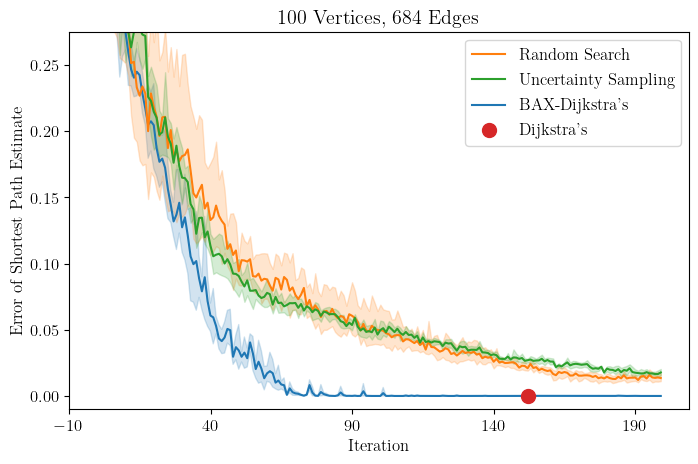

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))


dij_n_steps = 152


# Plot lineplot
sns.lineplot(data=df_averaged_over_samples, x="iteration", y="area", ax=ax, hue="acqfunc")

# Plot Dijkstra dot
ax.plot([dij_n_steps], [0.0], 'o', color="#d62728", markersize=10, label="Dijkstras")

# Set axes labels
ax.set(xlabel="Iteration",
       ylabel="Error of Shortest Path Estimate")
# ax.set(xlabel="Number of Queries",
#        ylabel="Area between sampled path and ground truth")


# Y axis
ax.set_ylim((-0.01, 0.275))
# ax.set_yscale('log')

# Ticks
start, end = ax.get_xlim()
stepsize = 50
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end, 0.05))

# Legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2], handles[0], handles[3]]
labels =["Random Search", "Uncertainty Sampling", "BAX-Dijkstra's", "Dijkstra's"]
legend = ax.legend(handles, labels)

# Add box around axes
ax.set_frame_on(True)

ax.spines['top'].set_visible(True)

ax.set_title('100 Vertices, 684 Edges')
# ax.set_title('($|V| = 100$, $|E| = 684$)')

# Save
fig.savefig("area.pdf", bbox_inches = 'tight')
fig.savefig("area.png", bbox_inches = 'tight')

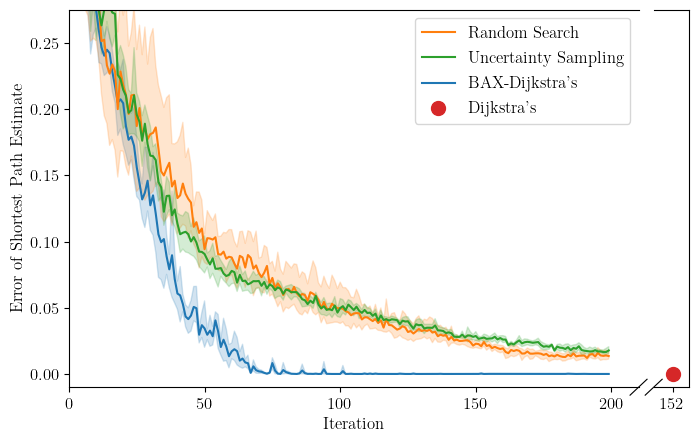

In [13]:
from brokenaxes import brokenaxes
baxes = brokenaxes(xlims=((0,210),(145, 158)), wspace=.05)
fig = baxes.fig
ax, ax2 = baxes.axs

fig.set_figwidth(8)
fig.set_figheight(5)


dij_n_steps = 152


# Plot lineplot
sns.lineplot(data=df_averaged_over_samples, x="iteration", y="area", ax=ax, hue="acqfunc")

# Plot Dijkstra dot
ax2.plot([dij_n_steps], [0.0], 'o', color="#d62728", markersize=10, label="Dijkstras")
# ax2.axvline(dij_n_steps, color="#d62728", linestyle="--", label="Dijkstras")


# Set axes labels
ax.set(xlabel="Iteration",
       ylabel="Error of Shortest Path Estimate")
# ax.set(xlabel="Number of Queries",
#        ylabel="Area between sampled path and ground truth")


# Y axis
ax.set_ylim((-0.01, 0.275))
ax2.set_ylim((-0.01, 0.275))
# ax.set_yscale('log')

# Ticks
start, end = ax.get_xlim()
stepsize = 50
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(dij_n_steps, end, stepsize))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end, 0.05))

# Legend
handles, labels = ax.get_legend_handles_labels()

handles = handles + [ax2.lines[1]]
handles = [handles[1], handles[2], handles[0], handles[3]]
labels =["Random Search", "Uncertainty Sampling", "BAX-Dijkstra's", "Dijkstra's"]
legend = ax.legend(handles, labels)

# Add box around axes
ax.set_frame_on(True)
ax2.set_frame_on(True)

ax.spines['top'].set_visible(True)
ax2.spines['top'].set_visible(True)
# ax.spines['right'].set_visible(True)
ax2.spines['right'].set_visible(True)

# Save
fig.savefig("area.pdf", bbox_inches = 'tight')
fig.savefig("area.png", bbox_inches = 'tight')

In [7]:
df_averaged_over_samples[:210]

,acqfunc,seed,iteration,truecost,area,weightedscore
0,bax,1,0,90.083120,0.293906,30.012358
1,bax,1,1,100.577407,0.349861,38.349965
2,bax,1,2,96.360428,0.358518,37.217278
3,bax,1,3,102.472515,0.364127,38.825927
4,bax,1,4,111.000200,0.400554,46.879976
...,...,...,...,...,...,...
205,bax,1,205,1.215711,0.001385,0.000008
206,bax,1,206,1.215711,0.001385,0.000008
207,bax,1,207,1.215711,0.001385,0.000008
208,bax,1,208,1.215711,0.001385,0.000008
